## Import Packages

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

## Prepare Dataset

In [11]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

In [12]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model to the data
logistic_regression.fit(features, labels)

# Predict the labels for the features
predictions_lr = logistic_regression.predict(features)

print("Logistic Regression Predictions:", predictions_lr)

Logistic Regression Predictions: [0 0 0 0 1 1 1 1]


In [13]:
# Get coefficients and intercept from the fitted model
coefficients_lr = logistic_regression.coef_[0]
intercept_lr = logistic_regression.intercept_[0]

print("Logistic Regression Coefficients:", coefficients_lr)
print("Logistic Regression Intercept:", intercept_lr)

Logistic Regression Coefficients: [1.00465774 0.93711261]
Logistic Regression Intercept: -3.1598379956479388


## Ploting functions

In [14]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
        
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
#    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)
    
def plot_boundary(features, labels, coefficients_lr, intercept_lr):
    # Define the range for the features
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    # Generate x values for the line
    xx = np.linspace(x_min, x_max, 100)

    # Calculate corresponding y values using the equation of the decision boundary:
    # w0*x0 + w1*x1 + intercept = 0
    # x1 = (-w0*x0 - intercept) / w1
    yy_lr = (-coefficients_lr[0] * xx - intercept_lr) / coefficients_lr[1]

    # Plot the decision boundary (line) for Logistic Regression
    plt.plot(xx, yy_lr, color='orange', linestyle='-', label='Logistic Regression Decision Boundary')

    # Re-plot the original points
    # Separate points based on their labels
    features_label0 = features[labels == 0]
    features_label1 = features[labels == 1]

    # Plot points with label 0 as red squares
    plt.scatter(features_label0[:, 0], features_label0[:, 1], c='red', marker='s', label='Label 0')

    # Plot points with label 1 as blue triangles
    plt.scatter(features_label1[:, 0], features_label1[:, 1], c='blue', marker='^', label='Label 1')

    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary and Data Points')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

## Visualize Feats, Labels, Intercepts and Coefficient

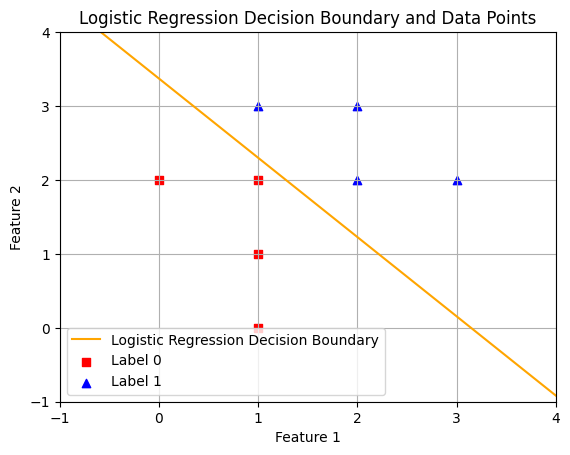

In [15]:
plot_boundary(features, labels, coefficients_lr, intercept_lr)